In [2]:
!pip install python-binance
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 112 kB 11.6 MB/s 
     |████████████████████████████████| 288 kB 68.5 MB/s 
     |████████████████████████████████| 749 kB 49.9 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ModuleNotFoundError: ignored

In [5]:
from binance.client import Client
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
plt.style.use('dark_background')
import numpy as np
#%matplotlib inline
client = Client()

In [32]:
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_4HOUR, limit = 100)
price = float (client.futures_symbol_ticker(symbol='BTCUSDT')["price"])

In [40]:
puntos_gafas = {
    "short" : [25080, 24496, 24175],
    "long":  [23591, 23326, 22744],
}

In [13]:
price_df = pd.DataFrame(candles, columns=['dateTime',
                                          'open',
                                          'high', 'low',
                                          'close', 'volume',
                                          'closeTime', 
                                          'quoteAssetVolume',
                                          'numberOfTrades', 
                                          'takerBuyBaseVol', 
                                          'takerBuyQuoteVol', 'ignore'])
price_df.dateTime = pd.to_datetime(price_df.dateTime, unit='ms')
price_df.set_index('dateTime')
price_df.closeTime = pd.to_datetime(price_df.closeTime, unit='ms')
price_df.close = pd.to_numeric(price_df.close)


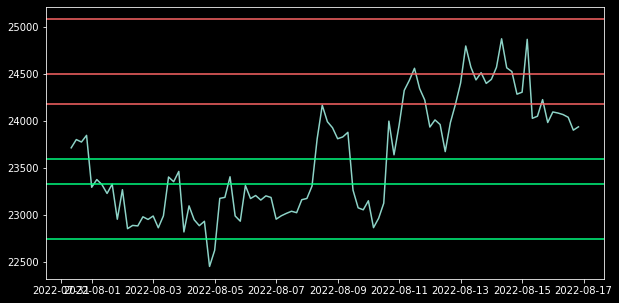

In [66]:
fig, ax = plt.subplots(1, figsize = (10,5))
ax.plot( price_df.closeTime , price_df.close )
ax.axhline (y = puntos_gafas["short"][0], color= "#ff6666")
ax.axhline (y = puntos_gafas["short"][1], color= "#ff6666")
ax.axhline (y = puntos_gafas["short"][2], color= "#ff6666")
ax.axhline ( y = puntos_gafas["long"][0], color = "#00ff80" )
ax.axhline ( y = puntos_gafas["long"][1], color = "#00ff80" )
ax.axhline ( y = puntos_gafas["long"][2], color = "#00ff80" )


In [64]:


print(f' Distancia {(puntos_gafas["short"][0]-price)/price*100} venta \n Distancia {(puntos_gafas["short"][1]-price)/price*100}  venta \n Distancia {(puntos_gafas["short"][2]-price)/price*100}  venta')
print(f" precio  : {price}")
print(f' Distancia {(puntos_gafas["long"][0]-price)/price*100} compra \n Distancia {(puntos_gafas["long"][1]-price)/price*100} compra \n Distancia {(puntos_gafas["long"][2]-price)/price*100} Compra \n ')

 Distancia 4.837664644877038 venta 
 Distancia 2.3964686260330113  venta 
 Distancia 1.0546468417026476  venta
 precio  : 23922.7
 Distancia -1.3865491771413792 compra 
 Distancia -2.494283671993549 compra 
 Distancia -4.927119430499069 Compra 
 


In [59]:
(puntos_gafas["short"][2]-price)/price*100
(puntos_gafas["long"][2]-price)/price*100

0.010546468417026476